In [1]:
import numpy as np 
import pandas as pd
import math
from scipy.spatial.distance import cdist # Tính khoảng cách giữa các cặp điểm trong 2 tập hợp một cách hiệu quả
import matplotlib.pyplot as plt
%matplotlib inline

# Tạo bộ dữ liệu bằng thư viện scikit-learn
Ta dùm hàm `sklean.datasets.make_blobs` để tạo ra một bộ dữ liệu ngẫu nhiên có 3 cụm và 200 điểm dữ liệu cho mỗi cụm theo phân phối chuẩn.

In [2]:
# Khai báo hàm make_blobs từ thư viện sklearn, tạo các cụm dữ liệu có đã được chọn trước
from sklearn.datasets import make_blobs
# Hàm make_blobs tạo bộ dữ liệu ngẫu nhiên trả về X là danh sách các mẫu và y là danh sách nhãn của các mẫu
X, y = make_blobs(n_samples=600, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=1, 
                  shuffle=True, 
                  random_state=10)
#số sample là 600, có 2 chiều, 3 tâm, độ lệch chuẩn 1, có trộn dữ liệu, số lần tạo mẫu ngẫu nhiên 
#là 10 lần sau đó trả lại kq cuối cùng

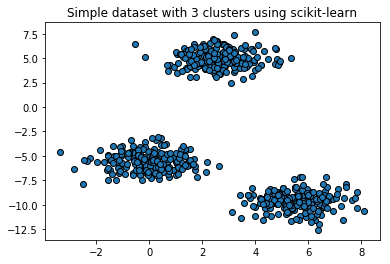

In [3]:
#Minh hoạ kết quả
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], edgecolor='k')
plt.title('Simple dataset with 3 clusters using scikit-learn')
plt.show()

# Thuật toán Hierarchical


Hàm `single_linkage` tạo nhãn cho dữ liệu dựa trên khoảng cách gần nhất giữa các cụm.

In [4]:
def single_linkage(data, dist, cutoff):
    '''
    - Thực hiện phân cụm dựa trên khoảng cách ngắn nhất giữa các cụm.
    - Các tham số:
    ----------------------
        data : np.ndarray / DataFrame
            Dữ liệu đầu vào.
        dist : np.ndarray
            Ma trận khoảng cách giữa các mẫu trong data.
        cutoff : int
            điểm cuối của vòng lặp, chỉ số vòng lặp sẽ chạy
            
    - Trả về:
    ----------------------
        d : dict
            Từ điển ghi lại các điểm hoặc các cụm đang được hợp nhất. Có thể dùng để tạo dendrogram.
        label : DataFrame
            Danh sách nhãn của các điểm dữ liệu trong data.
    '''
    # Khởi tạo một dataframe để chứa nhãn của các điểm dữ liệu
    df = pd.DataFrame(data=np.ones(data.shape[0])*np.inf) 
    # Khởi tạo một dictionary để chứa các điểm hoặc  các cụm đang được hợp nhất
    d = {} 
    # Chạy vòng lặp từ khoảng 0 tới giá trị muốn cắt
    for i in range(0,cutoff):
        # Tìm vị trí của giá trị nhỏ nhất trong ma trận khoảng cách vừa được tính
        ij_min = np.unravel_index(dist.argmin(), dist.shape) 
        # np.unravel_index sẽ trả về vị trí của phần tử nhỏ nhất của ma trận 
        # Sau khi tìm được phần tử nhỏ nhất và vị trí của chúng , ta sẽ gộp chúnglại
        
        # TH i = 0 tức là dòng 0 của df vừa khởi tạo 
        if i == 0:
            # Khi đó ta sẽ cho các dòng có giá trị là vị trí của phần tử nhỏ nhất của ma trận bằng 0
            df.iloc[ij_min[0]] = 0
            df.iloc[ij_min[1]] = 0
        else:
            # Nếu phần tử là int thì gán vào a
            try:
                a = int(df.iloc[ij_min[0]])
            # Nếu không thì ta gán phần tử vào i và ta gán i vào a
            except:
                df.iloc[ij_min[0]] = i
                a = i
            # Nếu phần tử là int thì gán vào b
            try:
            # Nếu không thì ta gán phần tử vào i và ta gán i vào b
                b = int(df.iloc[ij_min[1]])
            except:
                df.iloc[ij_min[1]] = i
                b = i
            df[(df[0]==a) | (df[0]==b)] = i
        d[i] = [ij_min]
        
        # hàm if ,else ở đây chủ yếu để điền vào dataframe các điểm cluster được kết hợp 
        # ví dụ như nếu cột 1 và 2 được kết hợp thì dataframe sẽ được trình diễn như 1:0 , 2:0 ( có nghĩa là điểm 1 và 2 có chung 1 cluster 0)
        for j in range(0, ij_min[0]):
            # Để  bỏ qua đường chéo của ma trận khoảng cách ta gán chúng bằng inf ở đầu bài để dễ tách điều kiện
            # Tìm các điểm dữ liệu là số thực tại các dòng có giá trị là vị trí có giá trị nhỏ nhất của ma trận khoảng cách 
            
            # Ta sẽ tìm các phần tử các phần tử là số thực trong các dòng có vị trí của phần tử nhỏ nhất của ma trận 
            if np.isfinite(dist[ij_min[0]][j]) and np.isfinite(dist[ij_min[1]][j]):
                #Sau khi 2 điểm dữ liệu được tạo thành 1 cụm , ta sẽ tính lại khoảng cách của các cụm khác tới cụm đó và 
                #lấy giá trị nhỏ nhất (single)
                dist[ij_min[1]][j] = min(dist[ij_min[0]][j], dist[ij_min[1]][j])
            # Sau khi các cột dữ liệu đã được liên kết ,để thuận lợi cho việc tính toán sau này, 
            #ta sẽ cho dữ liệu các dòng đó = inf 
        dist[ij_min[0]] = np.inf
        label = df[0]
        
    return d, label

Hàm `complete_linkage` tạo nhãn cho dữ liệu dựa trên khoảng cách xa nhất giữa các cụm.

In [5]:
def complete_linkage(data, dist, cutoff):
    '''
    - Thực hiện phân cụm dựa trên khoảng cách xa nhất giữa các cụm.
    - Các tham số:
    ----------------------
        data : np.ndarray / DataFrame
            Dữ liệu đầu vào.
        dist : np.ndarray
            Ma trận khoảng cách giữa các mẫu trong data.
        cutoff : int
            
    - Trả về:
    ----------------------
        d_complete : dict
            Từ điển ghi lại các điểm hoặc các cụm đang được hợp nhất. Có thể dùng để tạo dendrogram.
        label : DataFrame
            Danh sách nhãn của các điểm dữ liệu trong data.
    '''
    # Khởi tạo một dataframe để chứa nhãn của các điểm dữ liệu
    df = pd.DataFrame(data=np.ones(data.shape[0])*np.inf) 
    # Khởi tạo một dictionary để chứa các điểm hoặc  các cụm đang được hợp nhất
    d_complete = {}
    
    for i in range(0,cutoff):
        # Tìm vị trí của giá trị nhỏ nhất trong ma trận khoảng cách vừa được tính
        ij_min = np.unravel_index(dist.argmin(), dist.shape)
        # np.unravel_index sẽ trả về vị trí của phần tử nhỏ nhất của ma trận 
        # Đây là những gì cần thiết của hierarchical clustering, sau khi tìm được phần tử nhỏ nhất và vị trí của chúng ,
        # ta sẽ gộp lại
        
        # TH i = 0 tức là dòng 0 của df vừa khởi tạo 
        if i == 0:
            # Khi đó ta sẽ cho các dòng có giá trị tại vị trí của phần tử nhỏ nhất của ma trận bằng 0
            df.iloc[ij_min[0]] = 0
            df.iloc[ij_min[1]] = 0
        else:
            # Nếu phần tử là int thì gán vào a
            try:
                a = int(df.iloc[ij_min[0]])
            # Nếu không thì ta gán phần tử vào i và ta gán i vào a
            except:
                df.iloc[ij_min[0]] = i
                a = i
            # Nếu phần tử là int thì gán vào a
            try:
                b = int(df.iloc[ij_min[1]])
            # Nếu không thì ta gán phần tử vào i và ta gán i vào a
            except:
                df.iloc[ij_min[1]] = i
                b = i
            df[(df[0]==a) | (df[0]==b)] = i
        d_complete[i] = ij_min
        # hàm if ,else ở đây chủ yếu để điền vào dataframe các điểm cluster được kết hợp 
        # ví dụ như nếu cột 1 và 2 được kết hợp thì dataframe sẽ được trình diễn như 1:0 , 2:0 
        # ( có nghĩa là điểm 1 và 2 có chung 1 cluster 0)
        for j in range(0, ij_min[0]):
            # Chúng ta muốn bỏ qua đường chéo của ma trận khoảng cách và vì chúng bằng 0 
            # nên ta gán chúng băng inf để dễ tách điều kiện
            # Tìm các điểm dữ liệu là số thực tại các dòng có giá trị là vị trí có giá trị nhỏ nhất của ma trận khoảng cách 
            if np.isfinite(dist[ij_min[0]][j]) and np.isfinite(dist[ij_min[1]][j]):
                #Sau khi 2 điểm dữ liệu được tạo thành 1 cụm ,
                # ta sẽ tính lại khoảng cách của các cụm khác tới cụm đó và lấy giá trị lớn nhất (complete)
                dist[ij_min[1]][j] = max(dist[ij_min[0]][j], dist[ij_min[1]][j])
        # Sau khi các cột dữ liệu đã được liên kết ,
        # để thuận lợi cho việc tính toán sau này, ta sẽ cho dữ liệu các dòng đó = inf
        dist[ij_min[0]] = np.inf
        label = df[0]
    return d_complete, label

Hàm `avg_linkage` tạo nhãn cho dữ liệu dựa trên trung bình khoảng cách giữa các cụm.

In [6]:
def avg_linkage(data, dist, cutoff):
    '''
    - Thực hiện phân cụm dựa trên trung bình khoảng cách giữa các cụm.
    - Các tham số:
    ----------------------
        data : np.ndarray / DataFrame
            Dữ liệu đầu vào.
        dist : np.ndarray
            Ma trận khoảng cách giữa các mẫu trong data.
        cutoff : int
            
    - Trả về:
    ----------------------
        d_average : dict
            Từ điển ghi lại các điểm hoặc các cụm đang được hợp nhất. Có thể dùng để tạo dendrogram.
        label : DataFrame
            Danh sách nhãn của các điểm dữ liệu trong data.
    '''
    # Khởi tạo một dataframe để chứa nhãn của các điểm dữ liệu
    df = pd.DataFrame(data=np.ones(data.shape[0])*np.inf) 
    # Khởi tạo một dictionary để chứa các điểm hoặc  các cụm đang được hợp nhất
    d_average = {}
    for i in range(0,cutoff):
        # Tìm vị trí của giá trị nhỏ nhất trong ma trận khoảng cách vừa được tính
        ij_min = np.unravel_index(dist.argmin(), dist.shape)
        # np.unravel_index sẽ trả về vị trí của phần tử nhỏ nhất của ma trận 
        # Đây là những gì cần thiết của hierarchical clustering, sau khi tìm được phần tử nhỏ nhất và vị trí của chúng , ta sẽ gộp lại
        
         # TH i = 0 tức là dòng 0 của df vừa khởi tạo 
        if i == 0:
            # Khi đó ta sẽ cho các dòng có giá trị là vị trí của phần tử nhỏ nhất bằng 0
            df.iloc[ij_min[0]] = 0
            df.iloc[ij_min[1]] = 0
        else:
            # Nếu phần tử là int thì gán vào a
            try:
                a = int(df.iloc[ij_min[0]])
            # Nếu không thì ta gán phần tử vào i và ta gán i vào a
            except:
                df.iloc[ij_min[0]] = i
                a = i
            try:
                b = int(df.iloc[ij_min[1]])
            except:
                df.iloc[ij_min[1]] = i
                b = i
            df[(df[0]==a) | (df[0]==b)] = i
        d_average[i] = ij_min
        # hàm if ,else ở đây chủ yếu để điền vào dataframe các điểm cluster được kết hợp 
        # ví dụ như nếu cột 1 và 2 được kết hợp thì dataframe sẽ được trình diễn như 1:0 , 2:0 ( có nghĩa là điểm 1 và 2 có chung 1 cluster 0)
        for j in range(0, ij_min[0]):
            # Chúng ta muốn bỏ qua đường chéo của ma trận khoảng cách và vì chúng bằng 0 nên ta gán chúng băng inf để dễ tách điều kiện
            # Tìm các điểm dữ liệu là số thực tại các dòng có giá trị là vị trí có giá trị nhỏ nhất của ma trận khoảng cách 
            if np.isfinite(dist[ij_min[0]][j]) and np.isfinite(dist[ij_min[1]][j]):
                #Sau khi 2 điểm dữ liệu được tạo thành 1 cụm , ta sẽ tính lại khoảng cách của các cụm khác tới cụm đó bằng cách lấy giá trị trung bình của khoảng cách các cụm khác (average)
                dist[ij_min[1]][j] = (dist[ij_min[0]][j] + dist[ij_min[1]][j])/2.0          
        # Sau khi các cột dữ liệu đã được liên kết ,để thuận lợi cho việc tính toán sau này, ta sẽ cho dữ liệu các dòng đó = inf
        dist[ij_min[0]] = np.inf
        label = df[0]
    return d_average, label

Hàm chính của thuật toán Hierarchical.

In [7]:
def OwnHeirarchical(data, n_clusters, linkage = 'complete'):
    '''
    - Thực hiện phân cụm dữ liệu bằng thuật toán Hierarchical.
    - Các tham số:
    ----------------------
        data : np.ndarray / DataFrame
            Dữ liệu đầu vào.
        n_clusters : int
            Số cụm cần tìm.
        linkage : {'single', 'complete', 'average'}, mặc định là 'complete'
            Phương thức liên kết.
    - Trả về:
    ----------------------
        cluters : dict
            Từ điển ghi lại các điểm hoặc các cụm đang được hợp nhất. Có thể dùng để tạo dendrogram.
        label : np.ndarray
            Danh sách nhãn của dữ liệu
    '''

    # Bước 1 tính ma trận khoảng cách giữa các điểm dữ liệu
    distance_matrix = cdist(data, data) 
    # Bước 2 Vì ma trận khoảng cách là đối xứng nên ta chỉ cần giữ lại ma trận tam giác dưới của ma trận này 
    distance_matrix = np.tril(distance_matrix) 
    #Step 3 - Ta sẽ tìm các phần tử bằng 0 của ma trận này (đường chéo) và gán chúng bằng inf
    distance_matrix[distance_matrix == 0] = np.inf 
    # cutoff ở đây chỉ số vòng lặp sẽ chạy , tức là nó bằng số dòng của thuộc tính trừ cho số cluster mà ta muốn chia
    cutoff = data.shape[0] - n_clusters
    # Nếu trong trường hợp cutoff lớn hơn số dòng tức là số cluster muốn chia nhiều hơn số thuộc tính thì ta chỉ chia 1 cluster 
    if cutoff > distance_matrix.shape[0]:  
        cutoff = distance_matrix.shape[0]
    # Trường hợp single linkage
    if linkage == 'single':
        clusters, label = single_linkage(data, distance_matrix, cutoff)
    # Trường hợp complete linkage
    elif linkage == 'complete':
        clusters, label = complete_linkage(data, distance_matrix, cutoff)
    # Trường hợp average linkage
    else:
        clusters, label = avg_linkage(data, distance_matrix, cutoff)
    
    # Biến i khởi tạo để chạy vòng lặp với giá trị là 0
    i = 0
    # Ta sẽ tìm tên của từng nhóm riêng biệt trong cluster vừa chia
    for clust in label.unique():
        # Trường hợp = inf ta sẽ bỏ qua
        if clust == np.inf:
            continue
        # Còn nếu không thì thì ta sẽ đặt lại tên của cluster vừa được tạo theo thứ tự 0,1,2...
        else:
            label.loc[label==clust] = clust - clust + i
            i = i + 1
            
    # Sau đó, ta sẽ tiếp tục quét các phần tử label để tìm các giá trị = inf
    for j in range(len(label)):
        # Trong trường hợp các nhóm = inf , ta sẽ tiếp tục gán chúng = i từ giá trị i được khởi tạo trước
        if label[j] == np.inf:
            label[j] = i
            i = i + 1
    label = label.to_numpy().astype(int)
    return clusters, label

# Áp dụng thuật toán vừa viết vào dữ liệu ban đầu

1. Single-linkage clustering

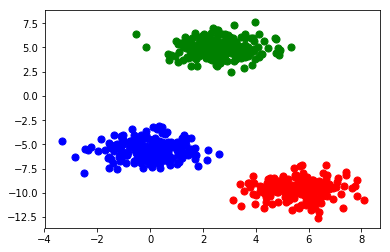

In [8]:
clusters_single, label_single = OwnHeirarchical(X, 3, 'single')
# Mô tả kết quả
plt.scatter(X[label_single==0, 0], X[label_single==0, 1], s=50, marker='o', color='red')
plt.scatter(X[label_single==1, 0], X[label_single==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[label_single==2, 0], X[label_single==2, 1], s=50, marker='o', color='green')
plt.show()

2. Complete-linkage clustering

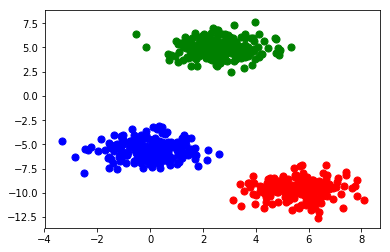

In [9]:
clusters_complete, label_complete = OwnHeirarchical(X, 3, 'complete')
# Mô tả kết quả
plt.scatter(X[label_complete==0, 0], X[label_complete==0, 1], s=50, marker='o', color='red')
plt.scatter(X[label_complete==1, 0], X[label_complete==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[label_complete==2, 0], X[label_complete==2, 1], s=50, marker='o', color='green')
plt.show()

3. Average-linkage clustering

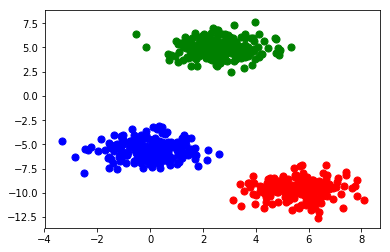

In [10]:
clusters_avg, label_avg = OwnHeirarchical(X, 3, 'average')
# Mô tả kết quả
plt.scatter(X[label_avg==0, 0], X[label_avg==0, 1], s=50, marker='o', color='red')
plt.scatter(X[label_avg==1, 0], X[label_avg==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[label_avg==2, 0], X[label_avg==2, 1], s=50, marker='o', color='green')
plt.show()

# Kết quả tìm được bằng thư viện scikit-learn
Ta sử dụng hàm `AgglomerativeClustering` trong thư viện `scikit-learn` để thực thi thuật toán Hierarchical.

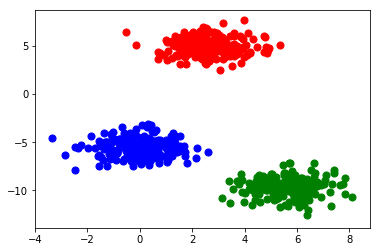

In [11]:
# Khai báo hàm AgglomerativeClustering từ thư viện scikit-learn
from sklearn.cluster import AgglomerativeClustering
# Khởi tạo thuật toán Agglomerative Clustering với 3 cụm và linkage = single
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
# Áp dụng mô hình trên cho dữ liệu X
model.fit(X)
# Lấy ra danh sách nhãn của từng điểm dữ liệu trong X sau khi áp dụng mô hình
labels = model.labels_
# Mô tả kết quả
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.show()

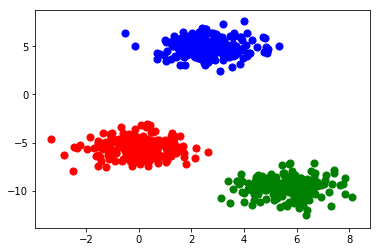

In [12]:
# Khởi tạo thuật toán Agglomerative Clustering với 3 cụm và linkage = complete
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
# Áp dụng mô hình trên cho dữ liệu X
model.fit(X)
# Lấy ra danh sách nhãn của từng điểm dữ liệu trong X sau khi áp dụng mô hình
labels = model.labels_
# Mô tả kết quả
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.show()

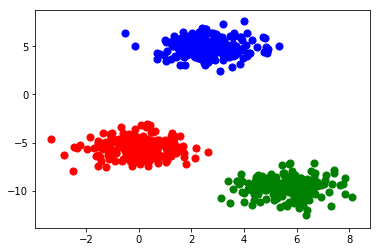

In [13]:
# Khởi tạo thuật toán Agglomerative Clustering với 3 cụm và linkage = average
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
# Áp dụng mô hình trên cho dữ liệu X
model.fit(X)
# Lấy ra danh sách nhãn của từng điểm dữ liệu trong X sau khi áp dụng mô hình
labels = model.labels_
# Mô tả kết quả
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.show()

## So sánh với hàm thư viện

CustomerData.csv: Tập dữ liệu đề cập đến khách hàng của một nhà phân phối bán buôn. Nó bao gồm chi tiêu hàng năm tính bằng đơn vị tiền tệ (m.u.) cho các danh mục sản phẩm đa dạng
Các cột dữ liệu bao gồm 8 cột: Channel, Region, Fresh, Milk, Grocery,
Detergents_Paper, Delicassen

In [1]:
import pandas as pd
data = pd.read_csv('CustomerData.csv')
data.head()



from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Chuẩn hóa dữ liệu
sc = StandardScaler()

X_std = sc.fit_transform(data)
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_std)

In [6]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [15]:
# Đặt tên lại bộ dữ liệu mới
df = pd.DataFrame(X_pca,columns = ['PC1','PC2'] )

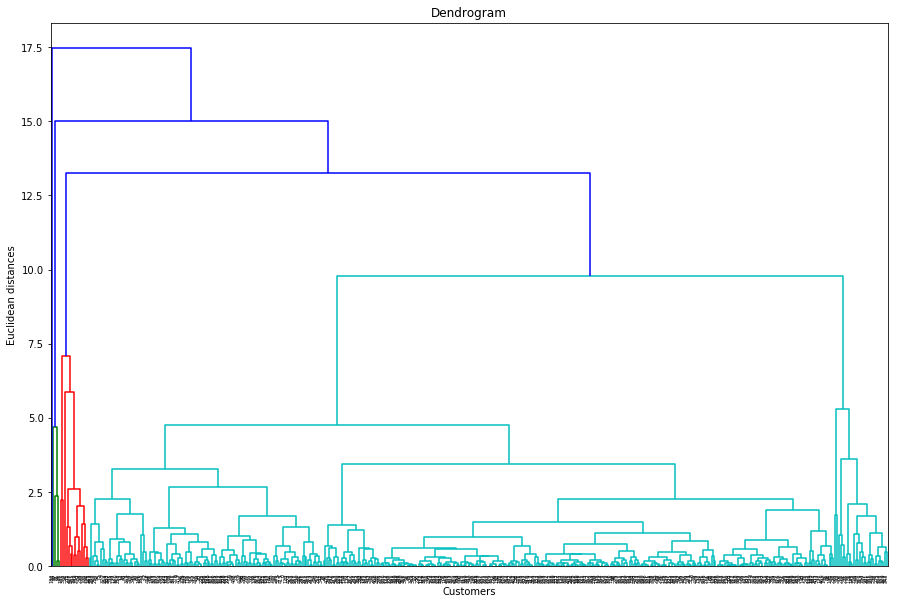

(439, 4)


In [16]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(sch.linkage(df, method='complete'), leaf_rotation=90, leaf_font_size=5)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()
print(sch.linkage(df, method='complete').shape)

In [17]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
# In ra label
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  
cluster.fit_predict(df)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# So sánh với hàm Scikit-learn

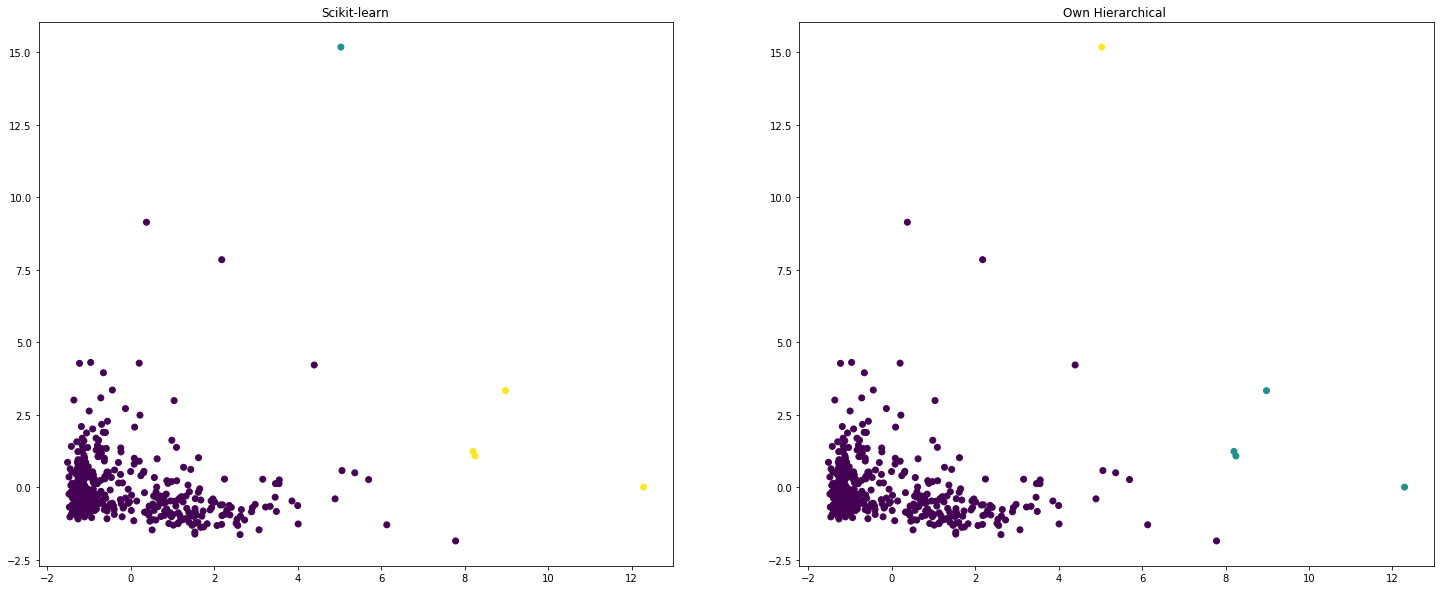

<Figure size 1440x1440 with 0 Axes>

In [18]:
clusters_single, label_single = OwnHeirarchical(df, 3, 'single')
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(25,10))
plt.figure(figsize =(20,20)) 
ax1.scatter(df['PC1'], df['PC2'], c= cluster.labels_)
ax1.set_title('Scikit-learn')
ax2.scatter(df['PC1'], df['PC2'], c=label_single)
ax2.set_title('Own Hierarchical ')
plt.show()

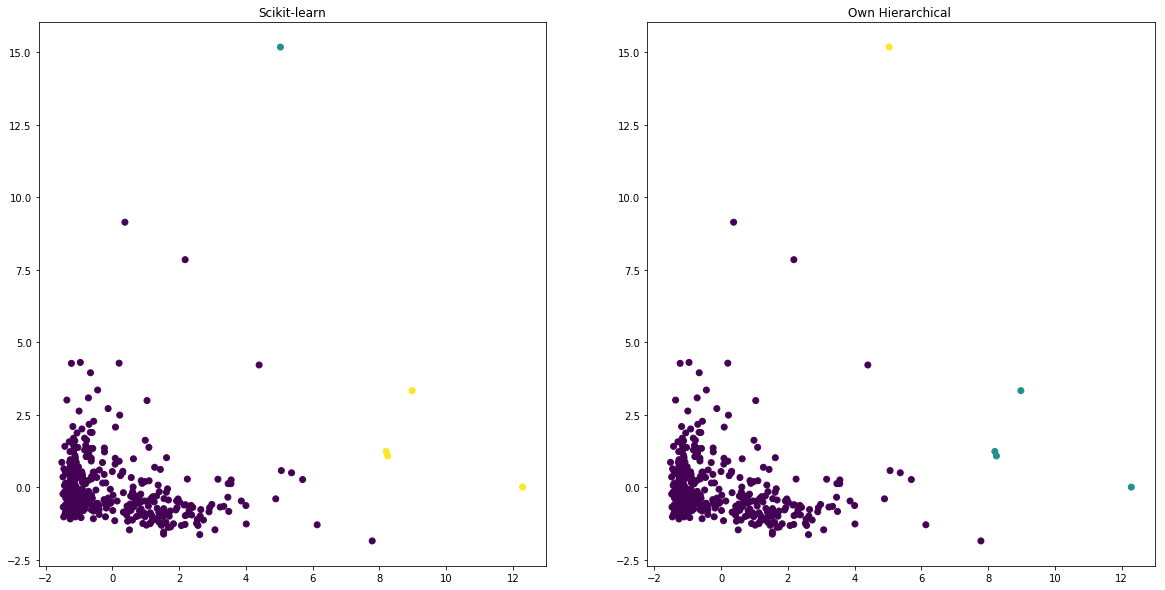

<Figure size 1440x1440 with 0 Axes>

In [19]:
clusters_complete, label_complete = OwnHeirarchical(df, 3, 'complete')
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
plt.figure(figsize =(20,20)) 
ax1.scatter(df['PC1'], df['PC2'], c= cluster.labels_)
ax1.set_title('Scikit-learn')
ax2.scatter(df['PC1'], df['PC2'], c=label_complete)
ax2.set_title('Own Hierarchical ')
plt.show()

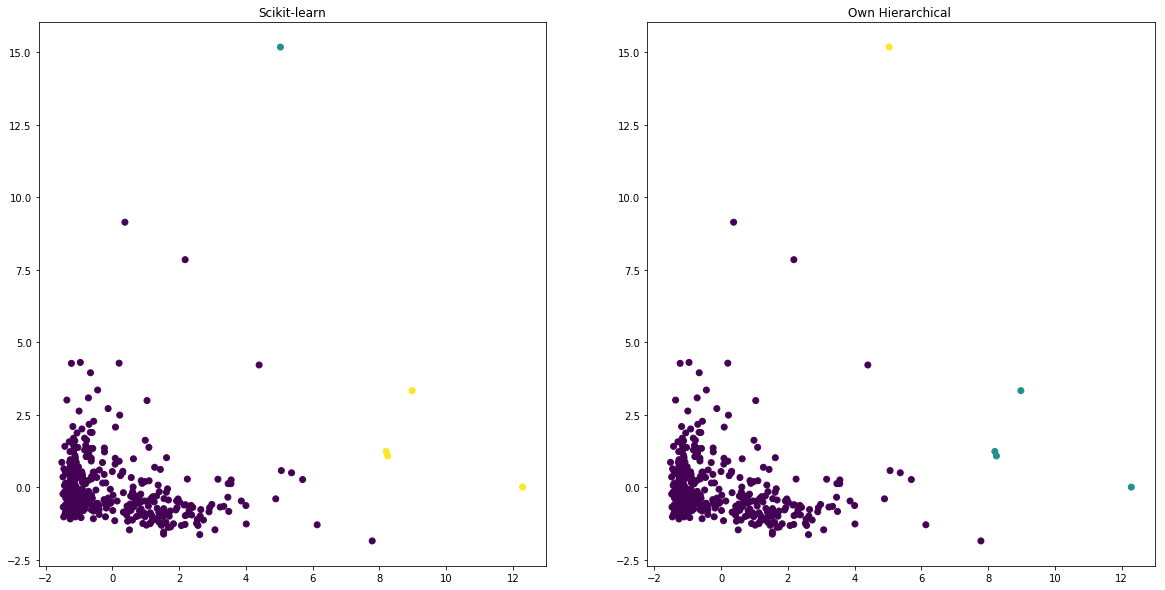

<Figure size 1440x1440 with 0 Axes>

In [20]:
clusters_average, label_average = OwnHeirarchical(df, 3, 'average')
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
plt.figure(figsize =(20,20)) 
ax1.scatter(df['PC1'], df['PC2'], c= cluster.labels_)
ax1.set_title('Scikit-learn')
ax2.scatter(df['PC1'], df['PC2'], c=label_average)
ax2.set_title('Own Hierarchical ')
plt.show()